In [ ]:
! pip install qucumber

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qucumber.nn_states import PositiveWaveFunction
from qucumber.callbacks import MetricEvaluator

import qucumber.utils.training_statistics as ts
import qucumber.utils.data as data
import qucumber

In [ ]:
psi_path = "tfim1d_psi.txt"
train_path = "tfim1d_data.txt"
train_data, true_psi = data.load_data(train_path, psi_path)

In [ ]:
nv = train_data.shape[-1]
nh = nv

nn_state = PositiveWaveFunction(num_visible=nv, num_hidden=nh, gpu=False)

In [ ]:
epochs = 500
pbs = 100
nbs = pbs
lr = 0.01
k = 10

In [ ]:
def psi_coefficient(nn_state, space, A, **kwargs):
    norm = nn_state.compute_normalization(space).sqrt_()
    return A * nn_state.psi(space)[0][4] / norm

In [ ]:
period = 10
space = nn_state.generate_hilbert_space()

In [ ]:
callbacks = [
    MetricEvaluator(
        period,
        {"Fidelity": ts.fidelity, "KL": ts.KL, "A_Ψrbm_5": psi_coefficient},
        target=true_psi,
        verbose=True,
        space=space,
        A=3.0,
    )
]

nn_state.fit(
    train_data,
    epochs=epochs,
    pos_batch_size=pbs,
    neg_batch_size=nbs,
    lr=lr,
    k=k,
    callbacks=callbacks,
    time=True,
)

Epoch: 10	Fidelity = 0.534832	KL = 1.251607	A_Ψrbm_5 = 0.109454
Epoch: 20	Fidelity = 0.626960	KL = 0.884104	A_Ψrbm_5 = 0.153996
Epoch: 30	Fidelity = 0.730629	KL = 0.586483	A_Ψrbm_5 = 0.195509
Epoch: 40	Fidelity = 0.798099	KL = 0.432933	A_Ψrbm_5 = 0.223553
Epoch: 50	Fidelity = 0.837640	KL = 0.338775	A_Ψrbm_5 = 0.235621
Epoch: 60	Fidelity = 0.870679	KL = 0.262989	A_Ψrbm_5 = 0.240179
Epoch: 70	Fidelity = 0.893492	KL = 0.212991	A_Ψrbm_5 = 0.236223
Epoch: 80	Fidelity = 0.910290	KL = 0.179548	A_Ψrbm_5 = 0.240323
Epoch: 90	Fidelity = 0.922206	KL = 0.155981	A_Ψrbm_5 = 0.237925
Epoch: 100	Fidelity = 0.931549	KL = 0.137175	A_Ψrbm_5 = 0.238603
Epoch: 110	Fidelity = 0.938568	KL = 0.122354	A_Ψrbm_5 = 0.232190
Epoch: 120	Fidelity = 0.945220	KL = 0.108639	A_Ψrbm_5 = 0.229719
Epoch: 130	Fidelity = 0.950264	KL = 0.098477	A_Ψrbm_5 = 0.228876
Epoch: 140	Fidelity = 0.954680	KL = 0.089989	A_Ψrbm_5 = 0.230366
Epoch: 150	Fidelity = 0.958187	KL = 0.083252	A_Ψrbm_5 = 0.227182
Epoch: 160	Fidelity = 0.960810	KL 

In [ ]:
# Note that the key given to the *MetricEvaluator* must be
# what comes after callbacks[0].
fidelities = callbacks[0].Fidelity

# Alternatively, we can use the usual dictionary/list subsripting
# syntax. This is useful in cases where the name of the
# metric contains special characters or spaces.
KLs = callbacks[0]["KL"]
coeffs = callbacks[0]["A_Ψrbm_5"]

epoch = np.arange(period, epochs + 1, period)

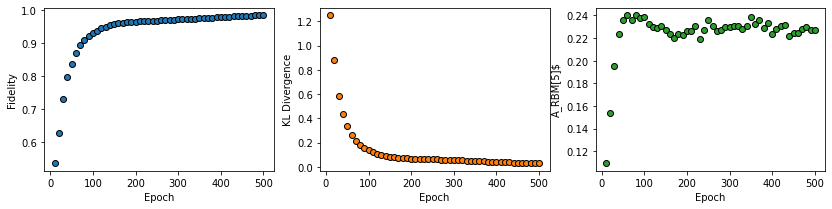

In [ ]:
# Plotting
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))

ax = axs[0]
ax.plot(epoch, fidelities, "o", color="C0", markeredgecolor="black")
ax.set_ylabel("Fidelity")
ax.set_xlabel("Epoch")

ax = axs[1]
ax.plot(epoch, KLs, "o", color="C1", markeredgecolor="black")
ax.set_ylabel("KL Divergence")
ax.set_xlabel("Epoch")

ax = axs[2]
ax.plot(epoch, coeffs, "o", color="C2", markeredgecolor="black")
ax.set_ylabel("A_RBM[5]$")
ax.set_xlabel("Epoch")

plt.show()

In [ ]:
nn_state.save("saved_params.pt")